In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

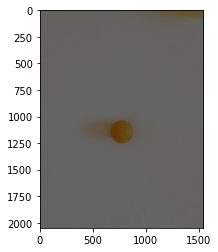

In [37]:
raw = cv2.imread("./pelota.png")
raw = cv2.cvtColor(raw, cv2.COLOR_BGR2HSV)
#raw[:,:,1] = 100
raw[:,:,2] = 100
raw = cv2.cvtColor(raw, cv2.COLOR_HSV2RGB)
plt.imshow(raw)

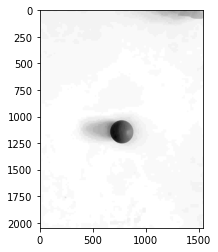

In [38]:
gray = cv2.cvtColor(raw, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = 'gray')

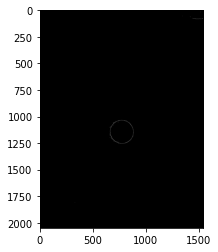

In [40]:
canny = cv2.Canny(gray, 15, 15, L2gradient=True)
plt.imshow(canny,  cmap = 'gray')

In [356]:
conts, hierarchy = cv2.findContours(canny, mode=cv2.cv2.RETR_LIST, method=cv2.CHAIN_APPROX_TC89_KCOS)

In [357]:
longs = [lens.shape[0] for lens in conts]
max = np.argmax(longs)

/tmp/ipykernel_21223/3504448301.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ctr = np.array(conts)


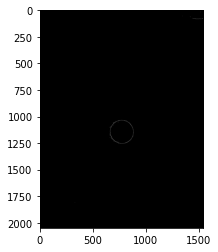

In [358]:
temp = np.ones(canny.shape,np.uint8)*255
ctr = np.array(conts)
cv2.drawContours(temp, ctr, -1, (255,0,0))
plt.imshow(canny, cmap='gray')
plt.show()

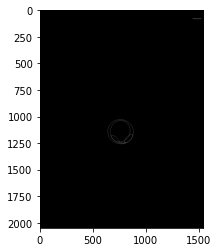

In [359]:
temp2 = np.ones(canny.shape,np.uint8)
ellipses = []
for i, cnt in enumerate(ctr):
    if len(cnt)>20:
        ellipse = cv2.fitEllipse(cnt)
        ellipses.append(ellipse)
        cv2.ellipse(temp2, ellipse, (255,0, 255))
plt.imshow(temp2, cmap='gray')

In [395]:
hull_list = []
for i in range(len(conts)):
    hull = cv2.convexHull(conts[i])
    hull_list.append(hull)

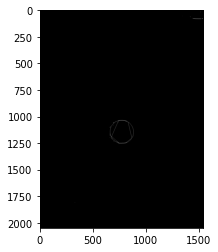

In [396]:
temp2 = np.ones(canny.shape,np.uint8)
ellipses = []
for i, cnt in enumerate(ctr):
    cv2.drawContours(temp2, hull_list, i, (255, 0, 0))
plt.imshow(temp2, cmap='gray')

hlist = []
for i in hull_list:
    for j in i:
        for z in j:
            hlist.append(z)

temp2 = np.ones(canny.shape,np.uint8)
rect = cv2.minAreaRect(np.array(hlist))
box = cv2.boxPoints(rect) # cv2.boxPoints(rect) for OpenCV 3.x
box = np.int0(box)
cv2.drawContours(temp2,[box],0,(0,0,255),2)

In [366]:
diams = [np.mean(ellipse[1])*1.3 for ellipse in ellipses]
biggest = ellipses[np.argmax(diams)]

In [314]:
diams = [np.mean(ellipse[1])*1.3 for ellipse in ellipses]
biggest = ellipses[np.argmax(diams)]

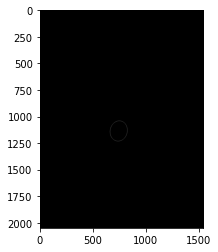

In [367]:
temp2 = np.ones(canny.shape,np.uint8)
cv2.ellipse(temp2, biggest, (255,0, 255))
plt.imshow(temp2, cmap='gray')

In [ ]:
diametrain = 1
dist = diametrain*27/(np.mean(biggest[1])*1.3)

In [436]:
import datetime


def biggest_ellipse_img(frame):
    raw = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    raw[:,:,2] = 50
    raw = cv2.cvtColor(frame, cv2.COLOR_HSV2BGR)
    gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)
    canny = cv2.Canny(gray, 15, 15, L2gradient=True)
    conts, hierarchy = cv2.findContours(canny, mode=cv2.cv2.RETR_LIST, method=cv2.CHAIN_APPROX_SIMPLE)
    ctr = np.array(conts)
    ellipses = []
    for cnt in ctr:
        if len(cnt)>5:
            ellipse = cv2.fitEllipse(cnt)
            ellipses.append(ellipse)
    diams = [np.mean(ellipse[1])*1.3 for ellipse in ellipses]
    return ellipses[np.argmax(diams)]


def get_dis_image(frame, ref):
    that = biggest_ellipse_img(frame)
    diametro_that = (np.mean(that[1])*1.3)
    diametro_ref = (np.mean(ref[1])*1.3)
    dist_cam_ref = 27 # cm
    return diametro_that*dist_cam_ref/diametro_ref, that


def get_dist_video(videopath):
    ref = biggest_ellipse_img(cv2.imread("./pelota.png"))
    distancias = []
    capture = cv2.VideoCapture(videopath)
    ct = str(datetime.datetime.now())
    fps = capture.get(cv2.CAP_PROP_FPS)
    width = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
    height =  int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video = cv2.VideoWriter('video'+ct+'.avi', fourcc, fps, (width, height))
    cnt = 0
    while capture.isOpened():
        ret, frame = capture.read()
        if ret == False:
            break
        dist, ell = get_dis_image(frame, ref)
        distancias.append(dist)
        cv2.ellipse(frame, ell, (255,0, 255))
        if cnt==0:
            dista = dist
        cnt = cnt+1
        cnt = cnt%9
        cv2.putText(frame, str(dista), (0,500), 2,fontScale=5, color=(255, 0, 0))
        video.write(np.uint8(frame))
    cv2.destroyAllWindows()
    video.release()
    return distancias

In [437]:
distancias = get_dist_video("./videopelotas.mp4")

/tmp/ipykernel_21223/1825474772.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ctr = np.array(conts)


In [334]:
distancias

[15.012201541672784,
 11.640448306039556,
 24.986087825152502,
 53.92360625146588,
 9.984476875593204,
 6.989479388490253,
 6.041191621123761,
 6.267703371700251,
 5.301448356181048,
 36.94493080474081,
 14.89551776844604,
 6.698823003820616,
 8.35194299652133,
 12.914091500893779,
 8.191754337787065,
 9.415840450867913,
 782.8995694681603,
 6.8945221652795095,
 7.098943942770748,
 8.272957199989477,
 10.481202000823634,
 87.75521923613957,
 21.24104268821965,
 10.126074317431813,
 45.986674829957316,
 11.290037493437765,
 25.297896958274606,
 9.186971074044461,
 257.14796391292145,
 5.3341698989491375,
 1117.2054117465898,
 8.96463082846897,
 25.92417986465633,
 19.04501764131133,
 7.473293516170768,
 7.134241755149502,
 17.594476880388154,
 8.457836433657599,
 13.602183377711748,
 9.2774472353269,
 6.520625252419943,
 7.478081129619318,
 230.87356535053013,
 15.34255819769557,
 9.622328792491489,
 35.64713777703859,
 10.126120785648682,
 9.120776521150393,
 9.463268086145822,
 14.327